In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()

In [ ]:
#TEST WIDTHS

ns = np.array([10])#[3,4,6,8,10,12,14,17,20])


###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
widths = [768,1024]
colors = cm.rainbow(np.linspace(0, 1, len(widths)))
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [0,1,2,4]#[0,1,2,4,6] #,2,4,6
Ls=[2]

n= 10
idxn = 0

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxw,width) in enumerate(widths):
            col = colors[idxw]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    else:
                        lr = 0.01
                    

                accs_cnn = []
                p_pred = n**(L+1)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                p_pred = n**(L+1)
                p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                if s0==1:
                    xx = np.array([1000,1398,1957,2738,3830,5358,7496,10488])
                      
                
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                #print(ptr)
                                tmp = load_file("cnn_test_large_width/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                #print("cnn_test_large_width/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxw,width) in enumerate(widths):
    nlist.append(mlines.Line2D([], [], color=colors[idxw], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2",'cnn2','cnn2']#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if s0<4:
                    lr = 0.1
                elif s0==4:
                    lr = 0.03
                else:
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                
                pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                p_pred = n**(L+1)
                p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)

                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                
                                tmp = load_file("cnn_test_large_width/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]

                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(((s0+1)**(0))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/v^{L+1}$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(1))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)v^{L+1})$",size = 15)
                    elif idxnet==2:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                 
                axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
#plt.savefig("diffeo_L3_A_ss_n4_fixed.pdf")
#plt.savefig("diffeo_L3_A_ss_n4_fixed.png", bbox_inches='tight')

In [ ]:
ns = np.array([10])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [0,1,2,4] #,2,4,6
Ls=[1]
s=2
for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    elif L==1: lss = '--'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    elif s0==6:
                        lr = 0.0003

                accs_cnn = []
                p_pred = n**(L)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


                if s0 <4:
                    xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                    xx =xx[:-1]
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                    xx =xx[:-1]
                    #xx1 = np.array([107999,135917])
                    #xx = np.concatenate((xx,xx1))
                
                
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 
                    
                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):


                    #print(ptr)
                        try:

                            #net+"_data_L"+str(2)+"_A_0s
                            tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            #if L>3:
                            #tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            print("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(2)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
                
                axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2","cnn2"]#


for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    elif s0==6:
                        lr = 0.0003

                accs_cnn = []
                p_pred = n**(L)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


                if s0 <4:
                    xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                    xx =xx[:-1]
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                    xx =xx[:-1]
                    #xx1 = np.array([107999,135917])
                    #xx = np.concatenate((xx,xx1))
                
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 
                    
                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):


                    #print(ptr)
                        try:

                            #net+"_data_L"+str(2)+"_A_0s
                            tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            #if L>3:
                            #    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
                 
                if idxnet==0:

                    fac_m = n*n**(L)
                    xx = xx/(fac_m*(s0+1)**(s))

                    axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^s$",size = 15)
                elif idxnet==1:
                    fac_m = n*n**(L)
                    xx = xx/(fac_m*(s0+1)**(L))

                    axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)


                axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                
                axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

In [ ]:
ns = np.array([4])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
seed = 1
lr = .1
width = 512
seed = 1
nets =["cnn2"]#


s0s = [2]
L=3
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
       
        p_pred = n**(L+1)
        if s0 <4:
            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)
            
        else:
            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
        xx = xx[:-1]
        print(xx)
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="cnn2":
                if s0<4:
                    lrs = [0.01]
                elif s0==4:
                    lrs = [0.003]
                else:
                    lrs = [0.001]
            for lr in lrs:
                for ptrx in xx:
                    ptr = int(ptrx)
                    #print(ptrx,ptr)
                    if ptr==259: ptr = 260
                    if ptr==25599: ptr = 25600    
                    try:
                        tmp = load_file(net+"_data_L3_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tr_loss = tmp['train loss']
                        plt.plot(range(len(tr_loss)),tr_loss,label ='lr=%.3f and P=%d'%(lr,ptr))
                    except:
                        print('P: '+str(ptr)+" and lr: "+str(lr))
                    
                    
plt.legend()

In [ ]:
ns = np.array([4,6,8,10])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,2, figsize = (10,4))
s0s = [0] #,2,4,6
Ls=[2,3,4]

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                     lr = 0.01


                accs_cnn = []
                p_pred = n**(L)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


                if s0 <4:
                    xx= np.logspace(np.log10(int(0.2*p_pred)),np.log10(100*p_pred),15)

                else:
                    xx= np.logspace(np.log10(0.2*p_pred),np.log10(300*p_pred),15)
                
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 
                    
                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):


                    #print(ptr)
                        try:
                            if ptr == 2559: ptr = 2560
                            #print(ptr)
                            if s0==0:
                                tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            else:
                                if L<=3:
                                    tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                if L>3:
                                    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
                
                axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2"]#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if net=="cnn2":
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if s0 <4:
                    xx= np.logspace(np.log10(int(0.2*p_pred)),np.log10(100*p_pred),15)

                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    
                    tmp_seed = 0

                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):


                    #print(ptr)
                        try:
                            if ptr == 2559: ptr = 2560
                            if s0==0:
                                tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            else:
                                if L<=3:
                                    tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                if L>3:
                                    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")


                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                            #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)


                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(n**(L+1)) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/v^{L+1}$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(2))*(n**(7*L/4))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1) v^{L+1})$",size = 15)
                    elif idxnet==2:
                        if s0==1:
                            factor = ((n**L)*L)/(2**L)
                        else:
                            
                            factor = (n**L)*s0*(s0**L-1)/((s0-1)*(s0+1)**L)
                        #xx = xx/(factor*(n**(L+1))) #s0**2
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L3_A_s0_0.pdf")
plt.savefig("diffeo_L3_A_s0_0.png", bbox_inches='tight')

In [ ]:
(10/644)*100

In [ ]:
ns = np.array([4])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [0,1,2,4,6]#[0,1,2,4,6] #,2,4,6
Ls=[2,3,4]

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0>0:
                        if L>=3:
                            if s0<4:
                                lr = 0.01
                            elif s0==4:
                                lr = 0.003
                            else:
                                lr = 0.001
                        elif L==2:
                            if s0<4:
                                lr = 0.1
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.01
                    else:
                        lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                #print(ptr)
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                #if idxnet==0 and idx_s0==0:
                    #print(accs_cnn)
                #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls=lss,color = col, alpha = .8)  
               # else:
                if L>=3 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                if L==2 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                if s0==0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                if L>=3 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2",'cnn2','cnn2']#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if s0>0:
                    if L>=3:
                        if s0<4:
                            lr = 0.01
                        elif s0==4:
                            lr = 0.003
                        else:
                            lr = 0.001
                    elif L==2:
                        if s0<4:
                            lr = 0.1
                        elif s0==4:
                            lr = 0.03
                        else:
                            lr = 0.01
                else:
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]

                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(((s0+1)**(0))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/v^{L+1}$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(1))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)v^{L+1})$",size = 15)
                    elif idxnet==2:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                 
                if L>=3 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)    
                if L==2 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col, alpha = .8)   
                if s0==0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if L>=3 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L3_A_ss_n4_fixed.pdf")
plt.savefig("diffeo_L3_A_ss_n4_fixed.png", bbox_inches='tight')

2
0
1
2
4
6
3
0
s0 not happened: 0and P: 42
1


<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


2


<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


4


<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


6


<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


4
0
1
s0 not happened: 1and P: 7775
s0 not happened: 1and P: 10804
s0 not happened: 1and P: 15013
s0 not happened: 1and P: 20860
s0 not happened: 1and P: 28985
s0 not happened: 1and P: 40275
s0 not happened: 1and P: 55962
s0 not happened: 1and P: 77760
s0 not happened: 1and P: 108047
2
s0 not happened: 2and P: 7775
s0 not happened: 2and P: 10804
s0 not happened: 2and P: 15013
s0 not happened: 2and P: 20860
s0 not happened: 2and P: 28985
s0 not happened: 2and P: 40275
s0 not happened: 2and P: 55962
s0 not happened: 2and P: 77760
s0 not happened: 2and P: 108047
4
s0 not happened: 4and P: 7775
s0 not happened: 4and P: 11686
s0 not happened: 4and P: 17564
s0 not happened: 4and P: 26397
s0 not happened: 4and P: 39673
s0 not happened: 4and P: 59626
s0 not happened: 4and P: 89614
6
s0 not happened: 6and P: 7775
s0 not happened: 6and P: 11686
s0 not happened: 6and P: 17564
s0 not happened: 6and P: 26397
s0 not happened: 6and P: 39673
s0 not happened: 6and P: 59626
s0 not happened: 6and P: 8961

<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
<ipython-input-5-a75eb5e780ef>:54: RuntimeWarning: overflow encountered in long_scalars
  pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


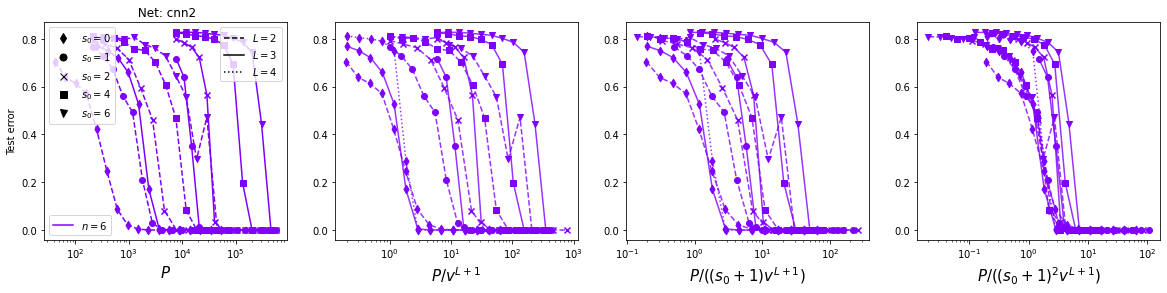

In [5]:
ns = np.array([6])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [0,1,2,4,6] #,2,4,6
Ls=[2,3,4]

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0>0:
                        if L>=3:
                            if s0<4:
                                lr = 0.01
                            elif s0==4:
                                lr = 0.003
                            else:
                                lr = 0.001
                        elif L==2:
                            if s0<4:
                                lr = 0.1
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.01
                    else:
                        lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)
                pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                #print(ptr)
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                #if idxnet==0 and idx_s0==0:
                    #print(accs_cnn)
                #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls=lss,color = col, alpha = .8)  
               # else:
                if L>=3 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                if L==2 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                if s0==0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                if L>=3 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2",'cnn2','cnn2']#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if s0>0:
                    if L>=3:
                        if s0<4:
                            lr = 0.01
                        elif s0==4:
                            lr = 0.003
                        else:
                            lr = 0.001
                    elif L==2:
                        if s0<4:
                            lr = 0.1
                        elif s0==4:
                            lr = 0.03
                        else:
                            lr = 0.01
                else:
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]

                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(((s0+1)**(0))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/v^{L+1}$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(1))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)v^{L+1})$",size = 15)
                    elif idxnet==2:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                 
                if L>=3 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)    
                if L==2 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col, alpha = .8)   
                if s0==0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if L>=3 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L3_A_ss_n6_fixed.pdf")
plt.savefig("diffeo_L3_A_ss_n6_fixed.png", bbox_inches='tight')

2
0
1
2
4
6
s0 not happened: 6and P: 74957
3
1
2
4
s0 not happened: 4and P: 544009
s0 not happened: 4and P: 817605
4
1
s0 not happened: 1and P: 3275
s0 not happened: 1and P: 5825
s0 not happened: 1and P: 10360
s0 not happened: 1and P: 18425
s0 not happened: 1and P: 32768
s0 not happened: 1and P: 45530
s0 not happened: 1and P: 63265
s0 not happened: 1and P: 87906
s0 not happened: 1and P: 122145
s0 not happened: 1and P: 169721
s0 not happened: 1and P: 235826
s0 not happened: 1and P: 327680
s0 not happened: 1and P: 455309
s0 not happened: 1and P: 632651
s0 not happened: 1and P: 879065
s0 not happened: 1and P: 1221457
s0 not happened: 1and P: 1697210
s0 not happened: 1and P: 2358266
2
s0 not happened: 2and P: 32768
s0 not happened: 2and P: 45530
s0 not happened: 2and P: 63265
s0 not happened: 2and P: 87906
s0 not happened: 2and P: 122145
s0 not happened: 2and P: 169721
s0 not happened: 2and P: 235826
s0 not happened: 2and P: 327680
s0 not happened: 2and P: 455309
s0 not happened: 2and P: 6

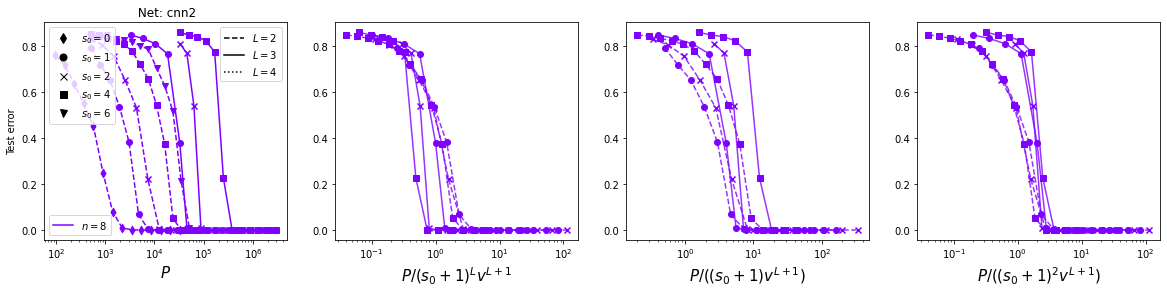

In [2]:
ns = np.array([8])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [0,1,2,4,6] #,2,4,6
Ls=[2,3,4]

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    if L==3:
        s0s = [1,2,4]
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0>0:
                        if L>=3:
                            if s0<4:
                                lr = 0.01
                            elif s0==4:
                                lr = 0.003
                            else:
                                lr = 0.001
                        elif L==2:
                            if s0<4:
                                lr = 0.1
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.01
                    else:
                        lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 
                    pmax = 1e17
                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                #print(ptr)
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                #if idxnet==0 and idx_s0==0:
                    #print(accs_cnn)
                #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls=lss,color = col, alpha = .8)  
               # else:
                if L>=3 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                if L==2 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                if s0==0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                if L>=3 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2",'cnn2','cnn2']#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
        
    if L==3:
        s0s = [1,2,4]
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if s0>0:
                    if L>=3:
                        if s0<4:
                            lr = 0.01
                        elif s0==4:
                            lr = 0.003
                        else:
                            lr = 0.001
                    elif L==2:
                        if s0<4:
                            lr = 0.1
                        elif s0==4:
                            lr = 0.03
                        else:
                            lr = 0.01
                else:
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]

                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(((s0+1)**(L))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^{L} v^{L+1}$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(1))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)v^{L+1})$",size = 15)
                    elif idxnet==2:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                 
                if L>=3 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)    
                if L==2 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col, alpha = .8)   
                if s0==0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if L>=3 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L3_A_ss_n8_fixed.pdf")
plt.savefig("diffeo_L3_A_ss_n8_fixed.png", bbox_inches='tight')

2
0
1
2
s0 not happened: 2and P: 416800
s0 not happened: 2and P: 721278
s0 not happened: 2and P: 1248183
4
3
0
1
2
4
s0 not happened: 4and P: 10000
s0 not happened: 4and P: 15029
s0 not happened: 4and P: 22587
s0 not happened: 4and P: 33947
s0 not happened: 4and P: 51020
s0 not happened: 4and P: 76680
4
0
s0 not happened: 0and P: 2000
s0 not happened: 0and P: 3117
s0 not happened: 0and P: 4859
s0 not happened: 0and P: 7574
s0 not happened: 0and P: 11807
s0 not happened: 0and P: 18405
s0 not happened: 0and P: 28690
s0 not happened: 0and P: 44721
s0 not happened: 0and P: 69710
s0 not happened: 0and P: 108663
1
s0 not happened: 1and P: 10000
s0 not happened: 1and P: 17782
s0 not happened: 1and P: 31622
s0 not happened: 1and P: 56234
s0 not happened: 1and P: 100000
2
s0 not happened: 2and P: 100000
4
s0 not happened: 4and P: 100000


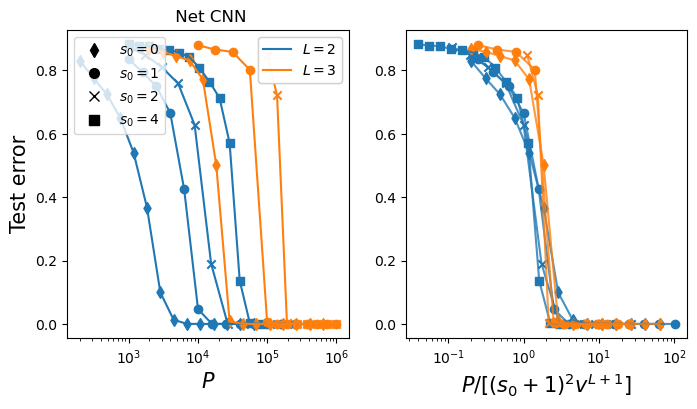

In [5]:
ns = np.array([10])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,2, figsize = (8,4))
s0s = [0,1,2,4] #,2,4,6
Ls=[2,3,4]
pmax = 1e7
for (idxL,L) in enumerate(Ls):
    print(L)
    lss = '-'
    if L==2: col = 'C0'
    elif L==3: col = 'C1'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            #col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net CNN")
                #print(n)
                if net=="cnn2":
                    if s0>0:
                        if L>=3:
                            if s0<4:
                                lr = 0.01
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.001
                        elif L==2:
                            if s0<4:
                                lr = 0.1
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.01
                    else:
                        lr = 0.01
                    if L==1:
                        if s0<4:
                            lr = 0.1
                        else:
                            lr = .03

                accs_cnn = []
                p_pred = n**(L+1)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                if L>1:
                    if s0>0:
                        if L>=3:
                            pmax = 110000

                            if s0 <4:
                                xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                            else:
                                xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                            if s0==1:
                                if n==8 or n==10:
                                    xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                    xx0 = xx0[:-1]
                                    xx = np.concatenate((xx0,xx))
                        elif L==2:
                            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                            p_pred = n**(L+1)
                            p_max_used = min(pmax,110000)
                            #p_pred = n**(L+1)
                            if s0>=4:
                                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                            else:
                                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)

                    else:
                        p_pred_red = n**L
                        xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                else:
                    p_pred_1 = n**L
                    if s0 <4:
                        xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                    else:
                        xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                if L==1:
                                #print(ptr)
                                    tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if s0==0:
                                        tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                    else:
                                        if L<=3:
                                            tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                        if L>3:
                                            tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                #if idxnet==0 and idx_s0==0:
                    #print(accs_cnn)
                #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls=lss,color = col, alpha = .8)  
               # else:
                if L>=3 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                if L==2 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                if L>1 and s0==0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)
                if L==1:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                if L>=3 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if L>1 and s0==0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==1:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error",size = 15)
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='C0', marker=None, linestyle='-',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='C1', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$n=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
#axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2"]#


for L in Ls:
    lss='-'
    if L==2: col = 'C0'
    elif L==3: col = 'C1'
    #elif L==4: lss = ':'
    elif L==1: lss = ':'    
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                #col = colors[idxn]
                if s0>0:
                    if L>=3:
                        if s0<4:
                            lr = 0.01
                        elif s0==4:
                            lr = 0.003
                        else:
                            lr = 0.001
                    elif L==2:
                        if s0<4:
                            lr = 0.1
                        elif s0==4:
                            lr = 0.03
                        else:
                            lr = 0.01
                else:
                    lr = 0.01
                if L==1:
                    if s0<4:
                        lr = 0.1
                    else:
                        lr = .03

                accs_cnn = []
                

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if L>1:
                    if s0>0:
                        if L>=3:
                            pmax = 110000
                            p_pred = n**(L+1)
                            if s0 <4:
                                xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                            else:
                                xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                            if s0==1:
                                if n==8 or n==10:
                                    xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                    xx0 = xx0[:-1]
                                    xx = np.concatenate((xx0,xx))
                        elif L==2:
                            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                            p_pred = n**(L+1)
                            p_max_used = min(pmax,110000)
                            #p_pred = n**(L+1)
                            if s0>=4:
                                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                            else:
                                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)

                    else:
                        p_pred_red = n**L
                        xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                else:
                    p_pred_1 = n**L
                    if s0 <4:
                        xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                    else:
                        xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(ptrx) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if L==1:
                                #print(ptr)
                                    tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if s0==0:
                                        tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                    else:
                                        if L<=3:
                                            tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                        if L>3:
                                            tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]
                
                if net =='cnn2':
                    if idxnet==2:
                        xx = xx/(((s0+1)**(L))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{L}v^{L+1})$",size = 15)
                    elif idxnet==1:
                        xx = xx/(((s0+1)**(1))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)v^{L+1})$",size = 15)
                    elif idxnet==0:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{2} v^{L+1}]$",size = 15)
                
                 
                if L>=3 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)    
                if L==2 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col, alpha = .8)   
                if s0==0:
                    if L>1:
                        axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                if L==1:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8) 
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if L>=3 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if L>1 and s0==0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==1:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col)  


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].legend()
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("figures/ptask_cnn_fixed.pdf", bbox_inches='tight')
plt.savefig("figures/ptask_cnn_fixed.png", bbox_inches='tight')

In [ ]:
ns = np.array([4,6,8,10])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["cnn2"]#i

fig, axs = plt.subplots(1,4, figsize = (15,4))
s0s = [1,4] #,2,4,6
Ls=[2,3,4]

for (idxL,L) in enumerate(Ls):
    print(L)
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):
        print(s0)

        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]

            for (idxnet,net) in enumerate(nets):
                axs[0].set_title(" Net: "+net)
                #print(n)
                if net=="cnn2":
                    if s0>0:
                        if L>=3:
                            if s0<4:
                                lr = 0.01
                            elif s0==4:
                                lr = 0.003
                            else:
                                lr = 0.001
                        elif L==2:
                            if s0<4:
                                lr = 0.1
                            elif s0==4:
                                lr = 0.03
                            else:
                                lr = 0.01
                    else:
                        lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)
                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]
                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                #print(ptr)
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print('s0 not happened: '+str(s0)+'and v: '+str(n)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]


                #if idxnet==0 and idx_s0==0:
                    #print(accs_cnn)
                #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls=lss,color = col, alpha = .8)  
               # else:
                if L>=3 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                if L==2 and s0>0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                if s0==0:
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d" 
                if L>=3 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                

                #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                #plt.axvline(x=n**4,color="red")
                #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                axs[0].set_xlabel(r"$P$",size = 15)
                axs[0].set_ylabel("Test error")
                axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
#first_legend = axs[0].legend()
#ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03,s04],loc = 'upper left') 
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=4$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02,s03],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$v=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING

nets =["cnn2","cnn2","cnn2"]#


for L in Ls:
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==4: lss = ':'
    for (idx_s0,s0) in enumerate(s0s):

        for (idxnet,net) in enumerate(nets):
            #axs[idxnet+1].set_title(" Net: "+net)

            for (idxn,n) in enumerate(ns):
                col = colors[idxn]
                if s0>0:
                    if L>=3:
                        if s0<4:
                            lr = 0.01
                        elif s0==4:
                            lr = 0.003
                        else:
                            lr = 0.001
                    elif L==2:
                        if s0<4:
                            lr = 0.1
                        elif s0==4:
                            lr = 0.03
                        else:
                            lr = 0.01
                else:
                    lr = 0.01

                accs_cnn = []
                p_pred = n**(L+1)

                #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                #print(s0,pmax)
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
                xx =xx[:-1]

                for ptrx in xx:

                    #print(ptrx,pmax)
                    ptr = int(min(ptrx,pmax)) 

                    if ptr<pmax:
                        tmp_seed = 0

                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):


                        #print(ptr)
                            try:
                                if ptr == 2559: ptr = 2560
                                if s0==0:
                                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                                else:
                                    if L<=3:
                                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                    if L>3:
                                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                pass
                                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                #xx = xx/p_pred
                red_xx = xx#[xx<=pmax]

                if net =='cnn2':
                    if idxnet==0:
                        xx = xx/(((s0+1)**(0))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/v^{L+1}$",size = 15)
                    elif idxnet==2:
                        xx = xx/(((s0+1)**(3))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^3 v^{L+1})$",size = 15)
                    elif idxnet==1:
                        
                        xx = xx/(((s0+1)**(2))*(n**(L+1))) #s0**2
                        axs[idxnet+1].set_xlabel(r"$P/((s_0+1)^{2} v^{L+1})$",size = 15)

                 
                if L>=3 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)    
                if L==2 and s0>0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col, alpha = .8)   
                if s0==0:
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col, alpha = .8)  
                    
                if s0==1:
                    mar = "o"
                elif s0==2:
                    mar = "x"
                elif s0==4:
                    mar = "s"
                elif s0==6:
                    mar = "v"
                elif s0==0:
                    mar = "d"
                if L>=3 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                if L==2 and s0>0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col)   
                if s0==0:
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 


                axs[idxnet+1].set_xscale("log")
            #axs[idxnet+1].set_xlim(left =1e2,)
            #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L3_A_ss.pdf")
plt.savefig("diffeo_L3_A_ss.png", bbox_inches='tight')

In [ ]:
#################################### FULLY-CONNECTED

1
2
4
6


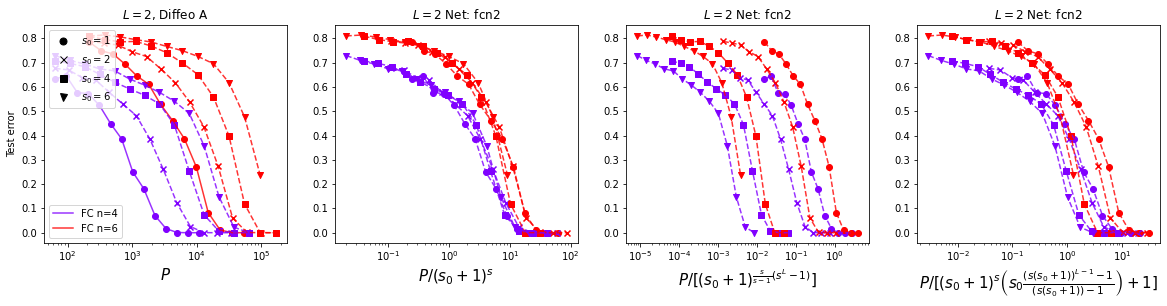

In [11]:
ns = np.array([4,6])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
s=2
###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2"]#

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [1,2,4,6]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:

                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idx_s0==0:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="FC n=%d" %n,ls="-",color = col, alpha = .8)     
            else:
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="-",color = col, alpha = .8)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
#axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2",'fcn2','fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                if idxnet==0:
                    xx = xx/(s0**(3/2))#*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/s_0$",size = 15)
            elif net =='fcn2':
                if idxnet==0:
                    #fac_s = s**(L-1)
                    if s0>0:
                        #fac_s0 = (s0*s)**(L-2)
                        fac_m = n*n**(L)
                        xx = xx/(fac_m*(s0+1)**(s))
                    else: 
                        fac_m = n*n**(L)
                        xx = xx/fac_m
                    axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^s$",size = 15)
                elif idxnet==1:
                    if s0>=0:
                        fac_s0 = (s0+1)**(s*(s**L-1)/(s-1))                       
                        fac_m = n*n**(L)
                        xx = xx/(fac_m*fac_s0)
                    else: 
                        fac_m = n*n**(L)
                        xx = xx/fac_m
                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{\frac{s}{s-1}(s^L-1)}]$",size = 15)
                elif idxnet==2:
                    if s0>=0:
                        fac_s0 = s0*((s*(s0+1))**(L-1)-1)/((s*(s0+1))-1)+1                
                        fac_m = n*n**(L)
                        xx = xx/(fac_m*((s0+1)**s)*fac_s0)
                    else: 
                        fac_m = n*n**(L)
                        xx = xx/fac_m
                    axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^s \left( s_0\frac{(s(s_0+1))^{L-1}-1}{(s(s_0+1))-1}\right)+1]$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        #axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_fcn.pdf")
plt.savefig("diffeo_L2_A_fcn.png", bbox_inches='tight')

In [ ]:
ns = ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index


s0s = [1,2,4,6]
L=2

pstars = torch.zeros((len(s0s),len(ns)))

for (idx_s0,s0) in enumerate(s0s):
    print('s0: '+str(s0))
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==4:
                                    lr = .03
                                elif s0==6 and n==6:
                                    lr = .003
                                elif s0==6 and n!=6:
                                    lr = 0.01
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            print(accs_cnn)
            if len(accs_cnn):
                target_value = 0.1
                closest_index = find_closest_position(accs_cnn, target_value)

                if abs(target_value - accs_cnn[closest_index])<= .1:
                    pstars[idx_s0, idxn] = int(xx[closest_index])
            
torch.save(pstars,'pstars_cnn_l2.pt')          
            

In [ ]:
ns = ns = np.array([3,4,6,8,10,12,14,17,20])
s0s = [1,2,4,6]
pstars = torch.load('pstars_cnn_l2.pt')        
L=2
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
fig, axs = plt.subplots(1,3, figsize = (20,4))

vs = []

for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            if idx_s0 ==0:
                axs[0].scatter([s0**(3/2)*n**(L+1)],[pstars[idx_s0, idxn]],label = r'n: %d'%(n),marker = mar,color = col)
            else:
                axs[0].scatter([s0**(3/2)*n**(L+1)],[pstars[idx_s0, idxn]],marker = mar,color = col)
            vs+=[s0**(2)*n**(L+1)]
                
                

min0 = min(vs)
max0 = max(vs)
print(min0,max0)
ps = np.arange(min0,max0,(max0-min0)/20)
C = max(pstars.flatten().tolist())/max0
axs[0].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$s_0^{3/2} n^{L+1}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 10\%$',size = 15)
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')   

#################################################################
vs=[]
ps0 =[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[1].scatter([s0**(3/2)],[pstars[idx_s0, idxn]/n**(L+1)],marker = mar,color = col)
            vs+=[s0**(3/2)]
            ps0 += [pstars[idx_s0, idxn]/n**(L+1)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[1].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[1].set_ylabel(r'$P*/n^{L+1}$',size = 15)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$s_0^{3/2}$',size = 15)

#################################################################
vs= []
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[2].scatter([n**(L+1)],[pstars[idx_s0, idxn]/s0**(3/2)],marker = mar,color = col)
            vs+=[n**(L+1)]
            ps0 += [pstars[idx_s0, idxn]/s0**(3/2)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[2].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$n^{L+1}$',size = 15)
axs[2].set_ylabel(r'$P*/s_0^{3/2}$',size = 15)

plt.savefig("P_L2_cnn.png", bbox_inches='tight')

In [ ]:
ns = np.array([4])#[3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"

lr = .1
width = 512
seed = 0
nets =["fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4,6]
L=3
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]

        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2":
                if s0<6:
                    lr = 0.01
                elif s0==6:
                    lr = 0.003
            
            accs_cnn = []
            p_pred = n**(L+1)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_max_used = 110000
            
            if s0<4:
                xx= np.logspace(np.log10(p_pred),np.log10(1000*p_pred),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(5000*p_pred),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            #print(ptr)
                            tmp = load_file(net+"_data_L3_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]


            if idxnet==0 and idx_s0==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            if net=="fcn2":
                if s0<6:
                    lr = 0.01
                elif s0==6:
                    lr = 0.003
            
            accs_cnn = []
            p_pred = n**(L+1)
            
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            #print(s0,pmax)
            p_max_used = 110000
            
            if s0<4:
                xx= np.logspace(np.log10(p_pred),np.log10(1000*p_pred),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(5000*p_pred),15)

            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            tmp = load_file(net+"_data_L3_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                            #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            
            if net =='fcn2':
                if idxnet==0:
                    xx = xx/((s0**(0))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(n^{L+1})$",size = 15)
                elif idxnet==1:
                    xx = xx/((s0**(3/2))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(s_0^{3/2} n^{L+1})$",size = 15)
                elif idxnet==2:
                    xx = xx/((s0**(2))*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(s_0^{2}n^{L+1})$",size = 15)
                elif idxnet==3:
                    xx = xx/((n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/(n^{L+1})$",size = 15)

        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss.pdf")
plt.savefig("diffeo_L2_A_ss.png", bbox_inches='tight')

In [ ]:
ns = np.array([3,4,5,6,7,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["fcn2"]#

def find_closest_position(lst, target):
    closest_index = min(range(len(lst)), key=lambda i: abs(lst[i] - target))
    return closest_index


s0s = [1,2,4,6]
L=2

pstars = torch.zeros((len(s0s),len(ns)))

for (idx_s0,s0) in enumerate(s0s):
    print('s0: '+str(s0))
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 1
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            if n==4:
                p_max_used = min(pmax,110000)
            else:
                p_max_used = min(pmax,510000)
            #p_pred = n**(L+1)
            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0==6: lr = 0.003
                            tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            print(accs_cnn)
            target_value = 0.05
            closest_index = find_closest_position(accs_cnn, target_value)
            
            if abs(target_value - accs_cnn[closest_index])<= .2:
                pstars[idx_s0, idxn] = int(xx[closest_index])
            
torch.save(pstars,'pstars_fc_l2.pt')          
            

In [ ]:
ns = np.array([3,4,5,6,7,8,10])
s0s = [1,2,4,6]
pstars = torch.load('pstars_fc_l2.pt')        
L=2
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
fig, axs = plt.subplots(1,3, figsize = (20,4))

vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            if idx_s0 ==0:
                axs[0].scatter([(s0**(3/2))*n**(L+1)],[pstars[idx_s0, idxn]],label = r'n: %d'%(n),marker = mar,color = col)
            else:
                axs[0].scatter([(s0**(3/2))*n**(L+1)],[pstars[idx_s0, idxn]],marker = mar,color = col)
            vs+=[(s0**(3/2))*n**(L+1)]
            ps0 += [pstars[idx_s0, idxn]]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)

C = max(ps0)/max0
axs[0].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')
                
                
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$s_0^{3/2} n^{L+1}$',size = 15)
axs[0].set_ylabel(r'$P^*$ s.t. $\varepsilon = 5\%$',size = 15)

s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'lower right')   

#################################################################
vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[1].scatter([s0**(3/2)],[pstars[idx_s0, idxn]/n**(L+1)],marker = mar,color = col)
        vs+=[s0**(3/2)]
        ps0 += [pstars[idx_s0, idxn]/n**(L+1)]


min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)

C = 0.7*max(ps0)/max0
axs[1].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$s_0^{3/2}$',size = 15)
axs[1].set_ylabel(r'$P*/n^{L+1}$',size = 15)
#################################################################
vs=[]
ps0=[]
for (idx_s0,s0) in enumerate(s0s):
    if s0==1:
        mar = "o"
    elif s0==2:
        mar = "x"
    elif s0==4:
        mar = "s"
    elif s0==6:
        mar = "v"

    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        
        if pstars[idx_s0, idxn]:
            axs[2].scatter([n**(L+1)],[pstars[idx_s0, idxn]/s0**(3/2)],marker = mar,color = col)
        vs+=[n**(L+1)]
        ps0 += [pstars[idx_s0, idxn]/s0**(3/2)]
                

min0 = min(vs)
max0 = max(vs)
ps = np.arange(min0,max0,(max0-min0)/20)
C = 0.7*max(ps0)/max0
axs[2].plot(ps,C*ps,label=r'$y=x$',color='black',ls='--')

axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel(r'$n^{L+1}$',size = 15)
axs[2].set_ylabel(r'$P*/s_0^{3/2}$',size = 15)

plt.savefig("P_L2_fc.png", bbox_inches='tight')

In [ ]:
ns = np.array([4,6])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4,6]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:

                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idx_s0==0:
                #print(accs_cnn)
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="CNN n=%d" %n,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="FC n=%d" %n,ls="-",color = col, alpha = .8)     
            else:
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="-",color = col, alpha = .8)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                if idxnet==0:
                    xx = xx/(s0**(3/2))#*(n**(L+1))) #s0**2
                    axs[idxnet+1].set_xlabel(r"$P/s_0$",size = 15)
            elif net =='fcn2':
                xx = xx/(s0**(1))
                axs[idxnet+1].set_xlabel(r"$P/s_0$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss_n_fixed.pdf")
plt.savefig("diffeo_L2_A_ss_n_fixed.png", bbox_inches='tight')

In [ ]:
ns = np.array([3,4,5,6,7,8,10,12,14])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [2,4]
L=2
for (idx_s0,s0) in enumerate(s0s):
    print(s0)
        
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:

                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idx_s0==0:
                #print(accs_cnn)
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="CNN n=%d" %n,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="FC n=%d" %n,ls="-",color = col, alpha = .8)     
            else:
                if idxnet ==0:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col, alpha = .8)  
                elif idxnet ==1:
                    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="-",color = col, alpha = .8)  
            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
axs[0].set_yscale("log")
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
axs[0].legend(handles=[s01,s02,s03,s04],loc = 'upper left')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2",'fcn2']#

for (idx_s0,s0) in enumerate(s0s):
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            
            if net=='cnn2':
                if s0>=4:
                    xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                else:
                    xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            elif net=='fcn2':
                if n==4:
                    p_max_used = min(pmax,110000)
                else:
                    p_max_used = min(pmax,510000)
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if s0<4:
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                if s0==6 and net =='fcn2':
                                    lr = .003
                                elif s0==4 and net =='cnn2':
                                    lr = .03
                                elif s0==6 and net =='cnn2' and n!=6:
                                    lr = .01
                                elif s0==6 and net =='cnn2' and n==6:
                                    lr = .003
                                tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                
                xx = xx/(n**(L+1)) #s0**2
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
            elif net =='fcn2':
                xx = xx/(n**(L+1))
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if s0==1:
                mar = "o"
            elif s0==2:
                mar = "x"
            elif s0==4:
                mar = "s"
            elif s0==6:
                mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 


            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")  
        
plt.savefig("diffeo_L2_A_ss_s_fixed.pdf")
plt.savefig("diffeo_L2_A_ss_s_fixed.png", bbox_inches='tight')

In [ ]:
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (16,4))

for L in Ls:
    axs[0].set_title(r"$L= %d$, Diffeo A" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = (4*n)**(2**L-1)*n
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            #xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    first_legend = axs[0].legend()
    ax = axs[0].add_artist(first_legend)
    axs[0].legend(handles=[cnn2,fcn2],loc = 'upper right')     
###############################################################

colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = (4*n)**(2**L-1)*n
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            for (idx_ptrx,ptrx) in enumerate(xx):
                #if idx_ptrx == (len(xx)-1):
                #    print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    tmp_seed = 0
                    num_seeds = 0
                    for (idx_seed,seed) in enumerate(np.array([1])):
                    
                    
                    #print(ptr)
                        try:
                            if ptr==810: 
                                ptr=809
                            #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                            #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                            tmp_seed += (100-tmp[choice]["acc"])/100
                            num_seeds +=1
                        except:
                            pass
                    if num_seeds>0:
                        accs_cnn.append(tmp_seed/num_seeds)
            if net =='cnn2':
                xx = xx/n**(L+1)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
            elif net =='fcn2':
                xx = xx/n**(L+1)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+1}$",size = 15)
        

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            #axs[idxnet+1].set_xlabel(r"$P/n^{L}$",size = 15)
            #axs[idxnet+1].set_ylabel("Test error")
            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")   
plt.savefig("diffeo_L2_A.pdf")
plt.savefig("diffeo_L2_A.png", bbox_inches='tight')

In [ ]:
###############################################################
ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        tmp = load_file(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+1/2)
            #if net=="fcn2":
            #    xx =xx/n
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)    
            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+1/2}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

In [ ]:
###############################################################
ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+2)
            
            #if net=="fcn2":
            #    xx =xx/n
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+2}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

In [ ]:
#training loss

ns = np.array([8])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
s0 =6
###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#
for L in Ls:
    plt.title(r"$L= %d$" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.01
                seed = 1
            
            train_loss = []
            epochs = []

            pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            p_pred = n**(L+1)
            p_max_used = min(pmax,110000)
            #p_pred = n**(L+1)
            if s0>=4:
                xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
            xx = xx[:-1]
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    #print(ptr)
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                          
                        train_loss= (tmp["train loss"])
                        epochs = (tmp["epoch"])
                        
                        #print(train_loss)
                        #print(epochs)
                    except:
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''

                if idxnet==0:
                    #print(accs_cnn)
                
                    plt.plot(epochs,train_loss,label="n=%d" %n,ls="--",color = col, alpha = .8)  
                else:
                    plt.plot(epochs,train_loss,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            
            plt.xlabel(r"Epochs",size = 15)
            plt.ylabel("Train loss")
            plt.xscale("log")
    plt.yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    #first_legend = plt.legend()
    #ax = plt.gca().add_artist(first_legend)
    #plt.legend(handles=[cnn2,hlcn,fcn2,gcnn],loc = 'upper right')     
    plt.show()

    
    

In [ ]:
#comparison CNN2 on data with and without diffeo
ns = np.array([3,4,8])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([3])
lr = .1
width = 512
seed = 0
nets =["cnn2","leo"]
for L in Ls:
    plt.title(r"CNN2 $L= %d$" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            print(n)
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        if net == 'cnn2':
                            if n!=6 and n!=10:
                                tmp = load_file("cnn2_data/cnn2_data/hier1_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            else:
                                tmp = load_file("cnn2_data/cnn2_data/hier1_cnn2_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        else:
                            #print(net+"_data/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                            tmp = load_file(net+"_data/hier1_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                        print(net+": not found at ptr: "+str(ptr))
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/p_pred
            red_xx = xx#[xx<=pmax]
            #print(len(accs_cnn))

            if idxnet==0:
                print(accs_cnn)
                plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                plt.plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="leo":
                mar = "s"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+1}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
    #plt.yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='No diffeo')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='Diffeo')

    
    first_legend = plt.legend()
    ax = plt.gca().add_artist(first_legend)
    plt.legend(handles=[cnn2,hlcn],loc = 'lower left')     
    plt.show()
    

In [ ]:
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

fig, axs = plt.subplots(1,3, figsize = (16,4))

for L in Ls:
    axs[0].set_title(r"$L= %d$, Diffeo B" %L)
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxnet,net) in enumerate(nets):
            #print(n)
            if net=="fcn2" or net=="gcnn":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed = 1
            
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            if n>10:
                xx1 = np.logspace(np.log10(10*p_pred),np.log10(pmax),5)
                xx = np.concatenate((xx,xx1))
            for ptrx in xx:
                
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                
                if ptr<pmax:
                    #print(ptr)
                    try:
                        if ptr==810: 
                            ptr=809
                        #hier1_ptr_34_n_3_L_2_seed_0_width_512_lr_0.3
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                        tmp_num = (100-tmp[choice]["acc"])/100 
                        accs_cnn.append(tmp_num)
                        #print(ptr, tmp_num)
                    except:
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            if idxnet==0:
                #print(accs_cnn)
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            else:
                axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls="--",color = col)  
            if net=="cnn2":
                mar = "o"
            elif net =="hlcn":
                mar = "x"
            elif net =="fcn2":
                mar = "s"
            elif net =="gcnn":
                mar = "v"
            axs[0].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 
            
            axs[0].set_xlabel(r"$P$",size = 15)
            axs[0].set_ylabel("Test error")
            axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    cnn2 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                  markersize=7, label='CNN2')
    hlcn = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=7, label='LCN')
    fcn2 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
                  markersize=7, label='FCN2')
    gcnn = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                  markersize=7, label='GCNN')
    first_legend = axs[0].legend()
    ax = axs[0].add_artist(first_legend)
    axs[0].legend(handles=[cnn2,fcn2],loc = 'upper right')     
###############################################################
ns = np.array([3,4,6,8,10,12,14,17,20])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        axs[idxnet+1].set_title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            if n>10:
                xx1 = np.logspace(np.log10(10*p_pred),np.log10(pmax),5)
                xx = np.concatenate((xx,xx1))
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax))
                #if n>10 and net=='cnn2':
                #    print("ok")
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                        #if n>10:
                        #    print("n: "+str(n)+" P: "+str(ptr))
                        pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            if net =='cnn2':
                xx = xx/n**(L+3)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+3}$",size = 15)
            elif net =='fcn2':
                xx = xx/n**(L+5)
                axs[idxnet+1].set_xlabel(r"$P/n^{L+5}$",size = 15)
            

            axs[idxnet+1].plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  
            if n==14 and net=='cnn2':
                print(xx*n**(L+3))
                print(accs_cnn)
            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            
            #axs[idxnet+1].set_ylabel("Test error")
            axs[idxnet+1].set_xscale("log")
        #axs[idxnet+1].legend()
        axs[idxnet+1].set_yscale("log")   
plt.savefig("diffeo_L2_B.pdf")
plt.savefig("diffeo_L2_B.png", bbox_inches='tight')

In [ ]:
###############################################################
# DIFFEO B

ns = np.array([3,4,6,8,10])
colors = cm.rainbow(np.linspace(0, 1, len(ns)))

###### L=3 ########
#NO WHITENING
choice = "best"
Ls = np.array([2])
lr = .1
width = 512
seed = 0
nets =["cnn2","fcn2"]#

for L in Ls:
    
    for (idxnet,net) in enumerate(nets):
        plt.title(r"$L= %d$" %L+" Net: "+net)
        
        for (idxn,n) in enumerate(ns):
            col = colors[idxn]
            #print(n)
            if net=="fcn2":
                lr =.01
                seed = 0
            else:
                lr =.1
                seed =1
            accs_cnn = []
            accs_fcn = []
            accs_fcn_L = []
            #print(n,L)
            #print(n**L)
            #print(n**(2**L))
            pmax  = n**(2**L)
            p_pred = n**(L+1)
            #print("pmax"+str(pmax))
            xx= np.logspace(np.log10(p_pred),np.log10(10*p_pred),10)
            for ptrx in xx:
                #print(ptrx,pmax)
                ptr = int(min(ptrx,pmax)) 
                if ptr<pmax:
                    try:
                        if ptr==810: 
                            ptr=809
                        #print(net+"_data_L2/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        tmp = load_file(net+"_data_L2_B/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        
                            
                        accs_cnn.append((100-tmp[choice]["acc"])/100)
                    except:
                         pass
                    '''
                    try:    
                        tmp = load_file("leo_data/hier1_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                        accs_fcn.append(tmp[choice]["acc"])
                    except:
                        print("FCN: not found at ptr: "+str(ptr))
                    '''
            xx = xx/n**(L+3)
            

            plt.plot(xx[:len(accs_cnn)],accs_cnn,label="n=%d" %n,ls="--",color = col, alpha = .8)  

            if net=="cnn2":
                mar = "o"
            #elif net =="hlcn":
            #    mar = "x"
            elif net =="fcn2":
                mar = "s"
            #elif net =="gcnn":
            #    mar = "v"
            plt.scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 

            #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
            #plt.axvline(x=n**4,color="red")
            #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
            plt.xlabel(r"$P/n^{L+3}$",size = 15)
            plt.ylabel("Test error")
            plt.xscale("log")
        plt.legend()
        plt.yscale("log")   
        plt.show()

More iterations at fixed P: five needed to understand the n=14 case and n=3 case

In [ ]:
#check for s0 =1

n=6
L=2
net='cnn2'
seed =1
width = 512
lr = 0.1
p_max  = (4*n)**(2**L-1)*n
p_pred = n**(L+1)
#print("pmax"+str(pmax))
xx= np.logspace(np.log10(p_pred),np.log10(50*p_pred),15)
print(xx)

acc0 = []    
acc1 = []
choice = 'best'
for ptrc in xx:
    ptr = int(ptrc)
    ptr = min(ptr,p_max)
    tmp = load_file("check/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_1_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    t1 = (100-tmp[choice]["acc"])/100
    acc1.append(t1)
print(acc1)
xx3= np.logspace(np.log10(p_pred),np.log10(p_max),15)  
xx0 =xx3[xx3<11000]
print(xx0)

for ptrc in xx0:
    ptr = int(ptrc)
    ptr = min(ptr,p_max)
    tmp = load_file("cnn2_data_L2_A/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    t0 = (100-tmp[choice]["acc"])/100
    acc0.append(t0)    
print(acc0)
plt.plot(xx0,acc0)
plt.plot(xx,acc1)

plt.xscale('log')
plt.yscale('log')